In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import splat
from matplotlib.backends.backend_pdf import PdfPages
from tqdm import tqdm

from popsims.plot_style import  plot_style

plot_style()
%matplotlib inline




Welcome to the Spex Prism Library Analysis Toolkit (SPLAT)!
If you make use of any features of this toolkit for your research, please remember to cite the SPLAT paper:

Burgasser et al. (2017, Astro. Soc. India Conf. Series 14, p. 7); Bibcode: 2017ASInC..14....7B

If you make use of any spectra or models in this toolkit, please remember to cite the original source.
Please report any errors are feature requests to our github page, https://github.com/aburgasser/splat/




In [2]:
#sorry for no documentation but you should be able reproduce the datafiles with this notebook

In [3]:
splat.initializeStandards()
ALL_STDS={}

for s in [splat.STDS_DWARF_SPEX, splat.STDS_DSD_SPEX,\
          splat.STDS_ESD_SPEX, splat.STDS_INTG_SPEX,
          splat.STDS_SD_SPEX]:
    ALL_STDS.update(s)
#ALL_STDS

In [4]:
#short names for visually confirmed ugly spectra 
bad_spectra=['J01073875-1314137', 'J01481478+1202447',
            'J02481204+2445141', 'J034325482+31551656', 'J034350565+32031800',
            'J03435925+3202502', 'J03441386+3156539', 'J034426561+32082064',
             'J03442694+3203494', 'J03442694+3203494','J03451604+3205141',
             'J03452212+3205450', 'J03452212+3205450', 'J034445206+32011971',
             'J04123277+1044083','J06211484+6558164', 'J11321822-3018316',
             'J20575592-0050060', 'J19165762+0509021', 'J17461199+50340362',
             'J17224432+6329470', 'J16134550+1708270', 'J15551573-0956055',
             'J15394189-0520428', 'J14351087-2333025', 'J14162409+1348267',
             'J13271521+0759375', 'J130831063+08185225', 'J12414645-2238178',
             'J11240487+3808054','J10492244+01255930', 'J07342571+3006583',
             'J06074213+4550370', 'J04430581-3202089', 'J04364275+1901348',
             'J2320292+412341','J21324036+1029494', 'J21304463-08452049',
             'J2047247+142152', 'J2035203-311008', 'J18000116-1559235',
             'J17461199+50340362','J17343053-1151388','J17224432+6329470',
             'J16545079+3747146', 'J16184503-1321297',
             'J16134550+1708270', 'J15551573-0956055', 'J15394189-0520428',
             'J14351087-2333025', 'J14162409+1348267', 'J10492244+01255930',
             'J07342571+3006583', 'J06022216+6336391', 'J03511847-1149326',
             'J01020186+0355405', 'J11473434+215359', 'J11473434+2153590',
            'J11491231-0153006', 'J11553951-37273499', 'J12414645-2238178',
            'J13081228+6103486','J130831063+08185225', 'J14162409+1348267',
            'J14351087-2333025', 'J15394189-0520428', 'J15551573-0956055',
            'J16134550+1708270',  'J16545079+3747146', 
            'J17224432+6329470', 'J17343053-1151388','J19165762+0509021',
            'J2035203-311008', 'J2047247+142152', 'J20571538+1715154', \
             'J20575592-0050060',  'J2320292+412341',
            'J05021345+1442367', 'J2047247+142152', 'J20571538+1715154',
            'J11553951-37273499', 'J16452211-1319516', 'J15551573-0956055']

#unresolved binary candidates listed in paper + everything in Table 5 to be safe
binary_candidates=np.unique(['J02361794+0048548', 'J093113.09+280228.9',
'J13114227+3629235', 'J13411160-30525049', 'J14532589+1420418',
'J20261584-2943124', 'J02060879+22355930', 'J04272708-1127143',
'J10365305-3441380', 'J10595138-2113082', 'J142227.20+221557.5',
'J16235970-0508114', 'J170725290-0138093', 'J1711457+223204',
'J000649.16-085246.3','J004757.41+154641.4', 'J00521232+0012172',
' J011912.22+240331.6','J000649.16-085246.3', 'J004757.41+154641.4', 'J00521232+0012172',
'J011912.22+240331.6',
'J020529.62+142114.0',
'J02060879+22355930',
'J02361794+0048548',
'J024749.90-163112.6',
'J03202839-0446358',
'J035104.37+481046.8',
'J04272708-1127143',
'J05185995-2828372',
'J07354882+2720167',
'J080531.84+481233.0',
'J090900.73+652527.2',
'J093113.23+280227.1',
'J09490860-1545485',
'J103931.35+325625.5',
'J10595138-2113082',
'J11061197+2754225',
'J120747.17+024424.8',
'J12144089+6316434',
'J13114227+3629235',
'J13153094-2649513',
'J13243559+6358284',
'J13411160-30525049',
'J141530.05+572428.7',
'J142227.20+221557.5',
'J143553.25+112948.6',
'J143945.86+304220.6',
'J14532589+1420418',
'J151114.66+060742.9',
'J151603.03+025928.9',
'J16235970-0508114',
'J17072529-0138093',
'J17114573+2232044',
'J17310140+5310476',
'J17373467+5953434',
'J20261584-2943124',
'J205235.31-160929.8',
'J21265916+7617440',
'J21392676+0220226',
'J222958.30+010217.2',
'J223348.82+002214.0',
'J235618.01+075420.4',
'J232315.39+071931.0'])

In [5]:
def get_designation(s):
    #print (s)
    coord=splat.designationToCoordinate(s)
    return splat.coordinateToDesignation(coord)

In [6]:
def plot_sp_sp(sp, a, shortname, spex_type):
    #plot a spectrum
    std=ALL_STDS[spex_type]
    
    chi, sc=splat.compareSpectra( sp, std)
    std.scale(sc)
    
    a.plot(sp.wave, sp.flux, c='k', linewidth=4, label=shortname)
    a.plot(std.wave, std.flux, c='#7FDBFF', linewidth=2, label='{} STD'.format(spex_type))
    
    xlim=[0.85, 2.4]
    mask= np.logical_and(sp.wave.value>xlim[0], sp.wave.value<xlim[1])
    ylim= [sp.flux[mask].value.min(), sp.flux.value[mask].max()]
    a.set(xlabel='Wave (micron)', ylabel=' Flux', xlim=xlim, ylim=ylim)
    
    a.legend()
    
def get_spectrum(filename):
    try:
        return splat.getSpectrum(filename=filename)[0]
    except:
        return 
    
def get_shortname(des):
    if '+' in des:
        c=des.split('+')
        return c[0][:5]+'+'+c[1][:4]
    if '-' in des:
        c=des.split('-')
        return c[0][:5]+'-'+c[1][:4]
    
def class_by_standard(sp):
    return splat.classifyByStandard(sp)[0]

In [7]:
%%capture
db= splat.searchLibrary()
spectra= db.DATA_FILE.apply(get_spectrum)

In [8]:
db['SPECTRA']= spectra

In [9]:
db['SPTYPE_BY_STANDARD']=[ class_by_standard(x) for x in tqdm(db.SPECTRA.values)]
db=(db[~db.SPEX_TYPE.isna()]).reset_index(drop=True)

100%|███████████████████████████████████████| 2037/2037 [03:16<00:00, 10.36it/s]


In [10]:
binary_cands_des=[get_designation(x) for x in binary_candidates]

In [11]:
db['FLAG_IS_SPECTRAL_BINARY_CAND']=db.DESIGNATION.isin(binary_cands_des)
db['FLAG_BAD_SPECTRA']= db.DESIGNATION.isin(bad_spectra)

In [12]:
np.unique(db.SPEX_GRAVITY_CLASSIFICATION.values.astype(str))

array(['FLD-G', 'INT-G', 'VL-G', 'nan'], dtype='<U5')

In [13]:
np.unique(db.NOTE_SP.values.astype(str))

array(['Possible J flux calibration problem', 'nan',
       'poor telluric correction'], dtype='<U35')

In [14]:
np.unique(db.SBINARY.astype(str))

array(['Y', 'nan'], dtype=object)

In [15]:
np.unique(db.METALLICITY_CLASS.astype(str))

array(['d/sd', 'esd', 'nan', 'sd'], dtype=object)

In [16]:
db['CLEAN']= np.logical_and.reduce([~db.FLAG_IS_SPECTRAL_BINARY_CAND,
                                    ~db.FLAG_BAD_SPECTRA,
                                    db.SPEX_GRAVITY_CLASSIFICATION=='FLD-G',
                                    db.NOTE.astype(str) =='nan',
                                    db.SBINARY.astype(str)=='nan',
                                    db.METALLICITY_CLASS.astype(str)=='nan'])
                                    

In [17]:
num_types=[splat.typeToNum(x) for x in db.SPTYPE_BY_STANDARD.values]
db=(db.loc[np.argsort(num_types)]).reset_index(drop=True)
#db.SPTYPE_BY_STANDARD[db.CLEAN]

In [18]:
#plot everything in a pdf
def plot_everything(df, filename):
    with PdfPages('/users/caganze/'+filename) as pdf:

        for g in np.array_split(df, int(len(df)/4)):
            

            fig, ax=plt.subplots(ncols=2, nrows=2)
            
            plot_sp_sp(g.SPECTRA.iloc[0], ax[0][0], g.DESIGNATION.iloc[0],  g.SPTYPE_BY_STANDARD.iloc[0] )
            plot_sp_sp(g.SPECTRA.iloc[1], ax[0][1],  g.DESIGNATION.iloc[1], g.SPTYPE_BY_STANDARD.iloc[1] )
            plot_sp_sp(g.SPECTRA.iloc[2], ax[1][0],  g.DESIGNATION.iloc[2], g.SPTYPE_BY_STANDARD.iloc[2])
            plot_sp_sp(g.SPECTRA.iloc[3], ax[1][1],  g.DESIGNATION.iloc[3], g.SPTYPE_BY_STANDARD.iloc[3])
            
            plt.tight_layout()
            pdf.savefig() 
            plt.close()
            


In [19]:
plot_everything(db[db.CLEAN].reset_index(drop=True), filename='clean_spectra.pdf')
plot_everything(db[db.FLAG_BAD_SPECTRA].reset_index(drop=True), filename='bad_spectra.pdf')

In [20]:
import splat.empirical as spe

In [21]:
def get_absolute_mag_j2mass(spt):
    #use pecaut for < spt <16
    if spt <=16:
        return spe.typeToMag(spt, '2MASS J', ref='pecaut2013')
    
    else:
        return spe.typeToMag(spt, '2MASS J', ref='dupuy2012')

In [22]:
get_absolute_mag_j2mass(15)

(9.25, 0.05)

In [23]:
sp=db.SPECTRA.iloc[0]
WAVEGRID=sp.wave[np.logical_and(sp.wave.value >=0.9, sp.wave.value <=2.4)].value
#WAVEGRID

In [24]:
def measure_fluxes(row):
    try:
        sp=row.SPECTRA
        spt=splat.typeToNum(row.SPTYPE_BY_STANDARD)

        #scale
        m, mer= get_absolute_mag_j2mass(spt)
        sp.fluxCalibrate('MKO J',m)

        #measure mags
        j, jerr=splat.filterMag(sp,'MKO J')
        h, herr=splat.filterMag(sp,'MKO H')
        k, kerr=splat.filterMag(sp,'MKO K')
        
        j2, jerr2=splat.filterMag(sp,'2MASS J')
        h2, herr2=splat.filterMag(sp,'2MASS H')
        k2, kerr2=splat.filterMag(sp,'2MASS K')
        #y, yerr=splat.filterMag(sp,'MKO Y')


        #interpolate
        interp_flux = np.interp(WAVEGRID, sp.wave.value, sp.flux.value) 
        intepr_noise= np.interp(WAVEGRID, sp.wave.value, sp.noise.value)

        #measure J-SNR
        jsnr=np.nanmedian(sp.flux[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value\
                 /sp.noise[np.logical_and(sp.wave.value >=1.1, sp.wave.value <=1.3)].value)

        return {'WAVEGRID': WAVEGRID,
               'FLUX': interp_flux,
               'UNCERTAINTY':  intepr_noise,
               'MKO_J': j,
               'MKO_J_ER': jerr,
                'MKO_H': h,
                'MKO_H_ER': herr,
                'J_SNR':jsnr,
                'MKO_KS': k,
               'MKO_KS_ER': kerr,
                '2MASS_J': j2,
               '2MASS_J_ER': jerr2,
                '2MASS_H': h2,
               '2MASS_H_ER': herr2,
                '2MASS_KS': k2,
               '2MASS_KS_ER': kerr2,
              
               }
    except ValueError:
        return {'WAVEGRID': None,
               'FLUX': None,
               'UNCERTAINTY':  None,
               'MKO_J': None,
               'MKO_J_ER': None,
                'MKO_H': None,
                'MKO_H_ER': None,
                'J_SNR': None,
                'MKO_KS': None,
               'MKO_KS_ER': None,
                '2MASS_J': None,
               '2MASS_J_ER': None,
                '2MASS_H': None,
               '2MASS_H_ER': None,
                '2MASS_KS': None,
               '2MASS_KS_ER': None,
              
               }

In [25]:
vals= db.apply(measure_fluxes, axis=1)

In [26]:
vals_df=pd.DataFrame([ x for x in vals])

In [27]:
db_small=db.join(vals_df).drop(columns=['SPECTRA'])

[Text(0.5, 0, '2MASS J-H'), Text(0, 0.5, 'J')]

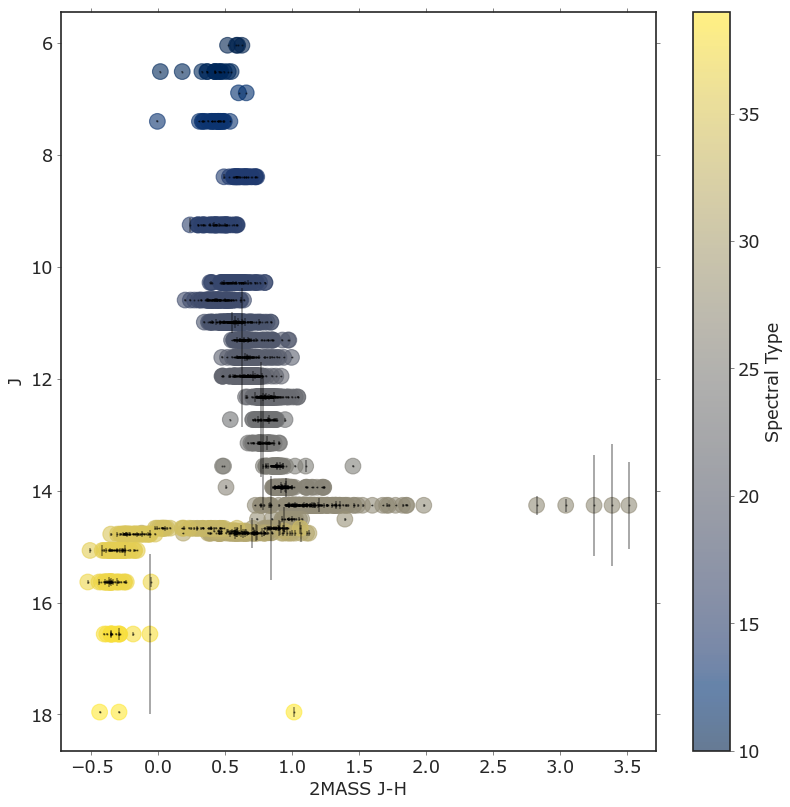

In [28]:
fig, ax=plt.subplots(figsize=(12, 12))


ax.errorbar(db_small.MKO_J-db_small.MKO_H, db_small.MKO_J,ms=1, fmt='o', \
            yerr=db_small.MKO_J_ER, c='k', alpha=0.4)
c=ax.scatter(db_small.MKO_J-db_small.MKO_H, db_small.MKO_J, \
           c=db_small.SPTYPE_BY_STANDARD.apply(splat.typeToNum), s=200,alpha=0.6, cmap='cividis')
plt.colorbar(c, label='Spectral Type')

ax.invert_yaxis()
ax.set(xlabel='2MASS J-H', ylabel='J')

In [61]:
np.isscalar('esd')

True

In [72]:
def float_to_empty_string(value):
    if isinstance(value, str):
        return value
    else:
        if np.isnan(value):
            return ''
        else:
            return str(value)
def get_flags(row):
    met= float_to_empty_string(row.METALLICITY_CLASS)
    lumn=  float_to_empty_string(row.LUMINOSITY_CLASS)
    noisy=''
    if row.FLAG_BAD_SPECTRA:
        noisy='noisy'
    sb=''
    if row.FLAG_IS_SPECTRAL_BINARY_CAND:
        sb='sbinary'
    return  met+'_'+lumn+'_'+noisy+'_'+sb

In [74]:
db_small['CLASS']=db_small.apply(get_flags, axis=1)

In [76]:
db_small[['CLASS', 'CLEAN']]

,CLASS,CLEAN
0,___,False
1,___,False
2,___,False
3,___,False
4,esd___,False
...,...,...
1888,___,False
1889,___,False
1890,___,False
1891,___,False


In [79]:
db_small=db_small.rename(columns={'SPEX_TYPE': 'SPEX_SPT',\
                                  'OPT_TYPE': 'OPT_SPT',\
                                  'NIR_TYPE': 'NIR_SPT',\
                                  'LIT_TYPE': 'LIT_SPT',\
                                  'SPTYPE_BY_STANDARD': 'SPT'})

In [34]:
db_small['SNR']=(db_small.FLUX/db_small.UNCERTAINTY).apply(lambda x: np.nanmedian(x))

In [80]:
cols=['NAME', 'DESIGNATION', 'FLUX', 'UNCERTAINTY','J_SNR','SPT','SPEX_SPT', 'OPT_SPT',\
      'NIR_SPT', 'LIT_SPT', 'CLASS', 'DATA_REFERENCE', 'MKO_J', 'MKO_H', 'MKO_KS',\
      '2MASS_J', '2MASS_H', '2MASS_KS', 'MKO_J_ER', 'MKO_H_ER', 'MKO_KS_ER',\
      '2MASS_J_ER', '2MASS_H_ER', '2MASS_KS_ER', 'WAVEGRID', 'CLEAN']


In [81]:
db_small[cols]

,NAME,DESIGNATION,FLUX,UNCERTAINTY,J_SNR,SPT,SPEX_SPT,OPT_SPT,NIR_SPT,LIT_SPT,...,2MASS_H,2MASS_KS,MKO_J_ER,MKO_H_ER,MKO_KS_ER,2MASS_J_ER,2MASS_H_ER,2MASS_KS_ER,WAVEGRID,CLEAN
0,Gliese 270,J07193126+3249482,"[1.6724994722494557e-08, 1.6559400961568826e-0...","[2.1095030236506496e-11, 1.3904583213986133e-1...",2065.456543,M0.0,M0.0,M0,M0,M0,...,5.379505,5.222527,0.000581,0.000554,0.001122,0.000565,0.000492,0.001034,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
1,V* V410 Tau,J04183110+2827162,"[1.6328530384752533e-08, 1.6306333765717147e-0...","[1.7484895866522663e-11, 1.7362855860232868e-1...",1508.530884,M0.0,M0.0,NaN,M0.0,K3Ve,...,5.414057,5.227992,0.000780,0.000719,0.001000,0.000742,0.000663,0.000979,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
2,WISE J183921.35-374431.0,J18392135-3744310,"[1.6551954169853277e-08, 1.6753430940803497e-0...","[3.9049695904866335e-11, 3.9916594832027647e-1...",581.457947,M0.0,M0.0,NaN,M0,M0,...,5.489314,5.259714,0.001816,0.002663,0.007052,0.001908,0.002761,0.006734,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
3,Gliese 270,J07193126+3249482,"[1.6925749486435052e-08, 1.673745570735935e-08...","[1.8574895852765624e-11, 1.8212881714280466e-1...",1258.298950,M0.0,M0.0,M0,M0,M0,...,5.413118,5.249317,0.000734,0.001019,0.001817,0.000974,0.000872,0.001818,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
4,LEHPM 2-59,J04520994-2245084,"[9.36633342209198e-09, 9.309977604509494e-09, ...","[1.3560943807541184e-10, 1.0677951912349032e-1...",83.949615,M1.0,M4.0,esdM8.5,esdM8,esdM8.5,...,6.318116,6.235252,0.013531,0.030114,0.037278,0.014060,0.028148,0.032172,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1888,WISE J025409.51+022358.6,J02540951+0223586,"[5.0031790151280836e-14, 8.082748159804989e-14...","[1.7008013847281577e-14, 1.6268236698750102e-1...",38.312576,T8.0,T8.0,NaN,T8,T8,...,16.858105,17.036881,0.013006,0.046295,0.108735,0.015873,0.045853,0.100892,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
1889,2MASSI J0415195-093506,J04151954-0935066,"[5.749910794725919e-14, 6.583350387817677e-14,...","[6.993382032515201e-15, 6.399256001278587e-15,...",67.750084,T8.0,T8.0,T8,T8,T8,...,16.830984,16.841848,0.007720,0.022867,0.051452,0.007749,0.027174,0.049283,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
1890,WISE J004945.61+215120.0,J00494561+2151200,"[1.5680202146412014e-14, 1.725156163125292e-14...","[6.031661286489666e-15, 6.1917470026695466e-15...",30.023281,T9.0,T8.0,NaN,T8.5,T8.5,...,18.386830,18.285238,0.016094,0.054354,0.145366,0.021030,0.064199,0.122940,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False
1891,UGPS J072227.51-054031.2,J07222759-05403839,"[1.6603038432378176e-14, 3.648573741481894e-14...","[5.168910270079256e-15, 5.154480025477044e-15,...",24.918734,T9.0,T9.0,NaN,T9+,T9+,...,18.230744,18.172918,0.015691,0.057425,0.111622,0.018750,0.063646,0.089459,"[0.90175974, 0.90518177, 0.90862197, 0.9120801...",False


In [ ]:
#'SPT' is the default spectral type from comparison to standards; leave the others in in case we want to use them
#'CLASS' can encompass all the flag keywords as just a set of strings: giant, subdwarf, young, binary, sbinary, noisy, weird, etc.
#For Binaries: we can add _1 and _2 and _12 for primary, secondary, combined parameters [--> we have a function for making binaries]


In [82]:
db_small[cols].to_hdf('/users/caganze/single_spectra_with_synthphot.h5', key='singles')

[None]

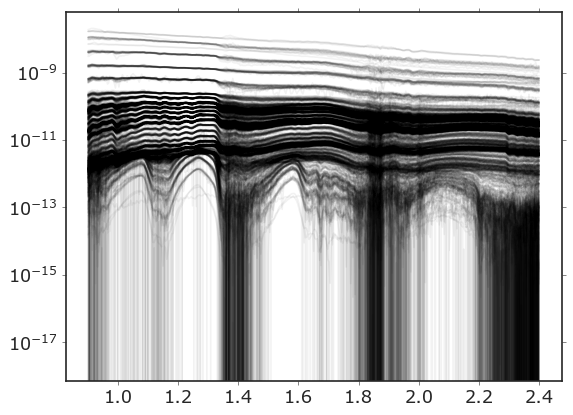

In [83]:
fig, ax=plt.subplots()
for idx, row in db_small.iterrows():
    try:
        ax.plot(row.WAVEGRID, row.FLUX, color='k', alpha=0.05)
    except:
        pass
ax.set(yscale='log')